In [1]:
import tensorflow as tf
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [2]:
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
x += np.random.uniform(-7, 7, 50) 
y += np.random.uniform(-7, 7, 50) 
  
n = len(x)

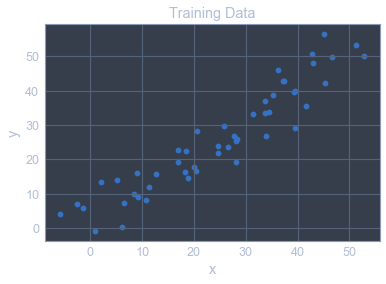

In [3]:
plt.scatter(x, y) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show()

In [4]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
learning_rate = 0.01
training_epochs = 1000

In [6]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.cast instead.


In [7]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
            
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

In [8]:
predictions = weight * x + bias

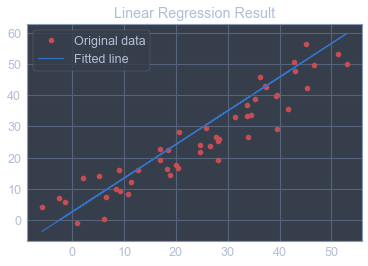

In [9]:
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 